In [54]:
# Librerías básicas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns

# Librerías de visualización
import matplotlib.pyplot as plt


# Librerías de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv("kc_house_data (2).csv")
df.head


<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1

# exploracion basica

#### id: identificador unico para cada vivienda 
#### price: Precio
#### bedrooms: Número de Dormitorios
#### bathrooms: Número de Baños
#### sqft_living: Área de Vida (pies cuadrados)
#### sqft_lot: Área de Terreno (pies cuadrados)
#### floors: Número de Pisos
#### waterfront: Frente al Agua (1 si es verdadero, 0 si es falso)
#### view: Vista
#### condition: Condición
#### grade: Grado
#### sqft_above: Área sobre el Suelo (pies cuadrados)
#### sqft_basement: Área del Sótano (pies cuadrados)
#### yr_built: Año de Construcción
#### yr_renovated: Año de Renovación
#### zipcode: Código Postal
#### lat: Latitud
#### long: Longitud
#### sqft_living15: Área de Vida en 2015 (vecindario)
#### sqft_lot15: Área de Terreno en 2015 (vecindario)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [57]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Manipulación de datos

In [59]:
df.drop(columns="id", inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# preparacion de los datos

In [60]:
# Cargar el conjunto de datos (reemplaza 'data.csv' con el nombre de tu archivo CSV)
data = pd.read_csv("kc_house_data (2).csv")

# Definir las características (X) y la variable objetivo (y)
X = data[['bedrooms', 'zipcode']]
y = data['price']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Crear el escalador MinMaxScaler y aplicarlo a las características de entrenamiento
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo

In [64]:
# Probamos con uno de los regresores más simples
model = LinearRegression()

model = model.fit(X_train, y_train)


In [65]:
# Esta función entrena el modelo y redondea los resultados
def pred(model, data_to_pred):
    y_pred = model.predict(data_to_pred)
    y_pred = np.rint(y_pred)
    return y_pred

In [66]:
data = pd.read_csv("kc_house_data (2).csv")



# Separar características (X) y variable objetivo (y)
X = data[['bedrooms']]
y = data['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
predictions = model.predict(X_test)

# Evaluar el modelo (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 136910807648.61534


In [67]:
# Cargar los datos (asegúrate de reemplazar 'data.csv' con el nombre de tu archivo)
data = pd.read_csv("kc_house_data (2).csv")

# Eliminar columnas no numéricas
data = data.drop(columns=['id', 'date'])

# Codificación de variables categóricas (ejemplo con 'zipcode')
data = pd.get_dummies(data, columns=['zipcode'], drop_first=True)

# Separar características (X) y variable objetivo (y)
X = data.drop('price', axis=1)
y = data['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluar el modelo (MSE)
mse = mean_squared_error(y_test, ridge_predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 29262466561.318493


In [68]:
# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Realizar predicciones en el conjunto de entrenamiento y calcular el error
predictions_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)

In [70]:
# Realizar predicciones en el conjunto de prueba y calcular el error
predictions_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)

In [71]:
# Calcular la diferencia porcentual entre los errores
percentage_diff = ((mse_test - mse_train) / mse_train) * 100

print(f"Mean Squared Error Train: {mse_train}")
print(f"Mean Squared Error Test: {mse_test}")
print(f"Percentage Difference: {percentage_diff:.2f}%")

if percentage_diff < 5:
    print("El modelo tiene un overfitting de menos del 5%")
else:
    print("El modelo podría tener overfitting")

Mean Squared Error Train: 25039083407.68959
Mean Squared Error Test: 29210847768.093315
Percentage Difference: 16.66%
El modelo podría tener overfitting


# Regularización (Ridge Regression):

In [72]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión Ridge con regularización L2
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha
ridge_model.fit(X_train, y_train)

# Predecir en los conjuntos de entrenamiento y prueba
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Calcular el Mean Squared Error en conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error Train: {mse_train}")
print(f"Mean Squared Error Test: {mse_test}")


Mean Squared Error Train: 25064995145.37942
Mean Squared Error Test: 29262466561.318493


# Validación Cruzada:

In [73]:
from sklearn.model_selection import cross_val_score

# Crear el modelo de regresión (por ejemplo, LinearRegression)
model = LinearRegression()

# Realizar validación cruzada con k-fold
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # Convertir puntuaciones negativas a positivas

print(f"Mean Squared Error CV Scores: {mse_scores}")
print(f"Mean Squared Error Mean: {mse_scores.mean()}")


Mean Squared Error CV Scores: [3.12541822e+10 2.96466180e+10 2.29903879e+10 2.22643865e+10
 2.58419983e+10]
Mean Squared Error Mean: 26399514595.996956


# Ajuste de Hiperparámetros:

In [74]:
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula de valores de hiperparámetros a probar
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Predecir en los conjuntos de entrenamiento y prueba usando el mejor modelo
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error Train: {mse_train}")
print(f"Mean Squared Error Test: {mse_test}")


Best Alpha: 0.01
Mean Squared Error Train: 25039084899.63465
Mean Squared Error Test: 29211069584.07304


c:\Users\monte\ver\TE_ML\army\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


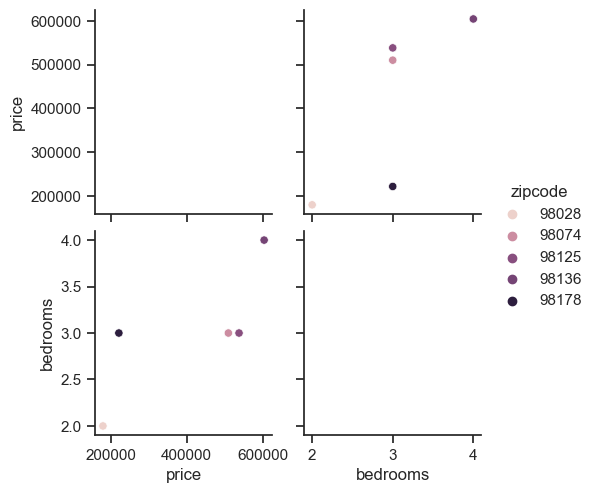

In [75]:

# Crear un diccionario con los datos
data = {
    'price': [221900, 538000, 180000, 604000, 510000],
    'bedrooms': [3, 3, 2, 4, 3],
    'zipcode': [98178, 98125, 98028, 98136, 98074]
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Establecer el estilo "ticks"
sns.set_theme(style="ticks")

# Crear un pairplot similar al de los datos de pingüinos
sns.pairplot(df, hue="zipcode")
plt.show()